In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set(style='whitegrid')

# Load Data
file_path = (r'C:\Users\luket\Downloads\E-commerce churn dataset - REES46\rees46_customer_model.csv')  
df = pd.read_csv(file_path)

# Check negatives
cols_to_check = [
    'target_customer_value', 'target_actual_profit', 'target_revenue',
    'view_count_mean', 'cart_count_mean', 'purchase_count_mean',
    'time_to_view_mean', 'time_to_cart_mean', 'time_to_purchase_mean'
]

for col in cols_to_check:
    neg_count = (df[col] < 0).sum()
    print(f"{col}: {neg_count} negative values")


target_customer_value: 12 negative values
target_actual_profit: 77963 negative values
target_revenue: 0 negative values
view_count_mean: 0 negative values
cart_count_mean: 0 negative values
purchase_count_mean: 0 negative values
time_to_view_mean: 0 negative values
time_to_cart_mean: 0 negative values
time_to_purchase_mean: 0 negative values


In [ ]:
# Check for zeros or outliers
zero_counts = df[[
    'view_count_mean', 'cart_count_mean', 'purchase_count_mean',
    'time_to_view_mean', 'time_to_cart_mean', 'time_to_purchase_mean'
]].apply(lambda col: (col == 0).sum()).to_frame(name='zero_count')

zero_counts['percent'] = 100 * zero_counts['zero_count'] / len(df)
display(zero_counts)


,zero_count,percent
view_count_mean,0,0.00
cart_count_mean,4382,3.89
purchase_count_mean,0,0.00
time_to_view_mean,4,0.00
time_to_cart_mean,2,0.00
time_to_purchase_mean,23,0.02


In [3]:
# Flag direct buyers
df['is_direct_buyer'] = df['cart_count_mean'] == 0

# Filter out time_to_* == 0
time_cols = ['time_to_view_mean', 'time_to_cart_mean', 'time_to_purchase_mean']
for col in time_cols:
    df = df[df[col] != 0]


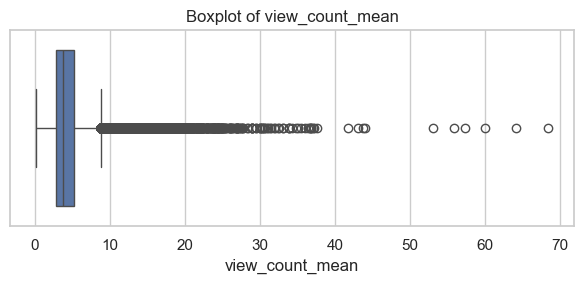

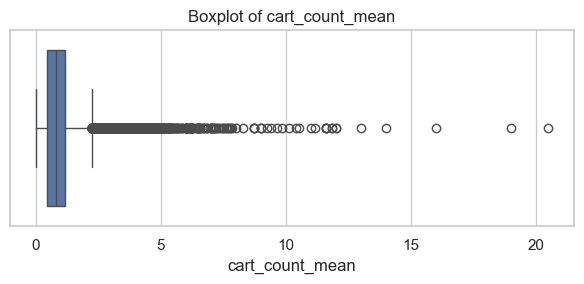

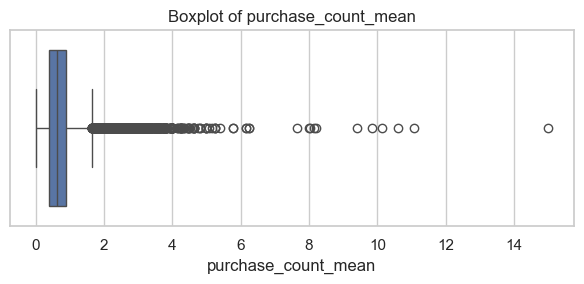

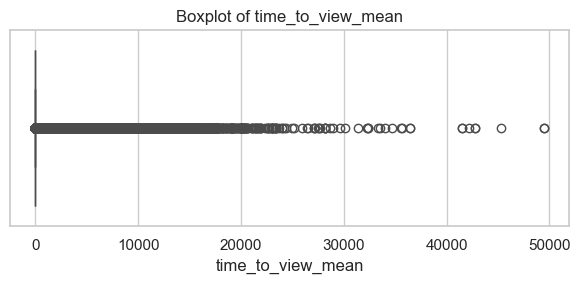

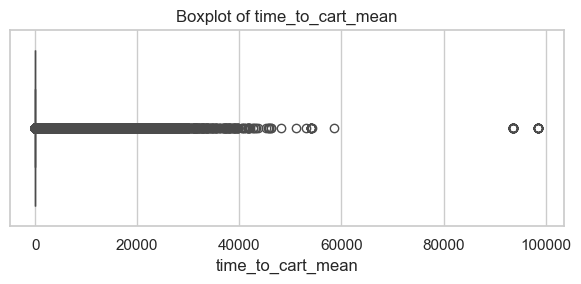

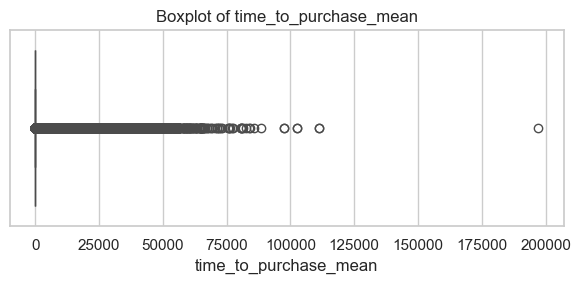

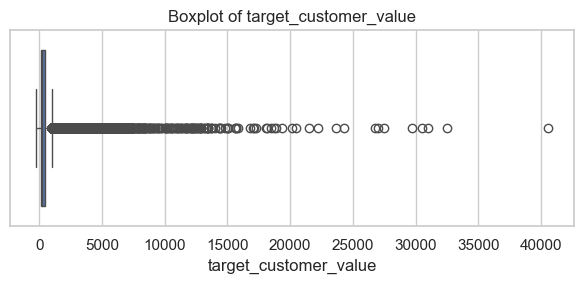

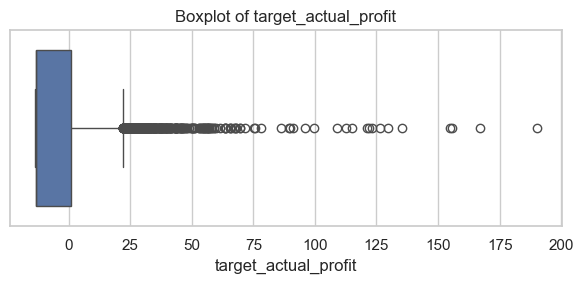

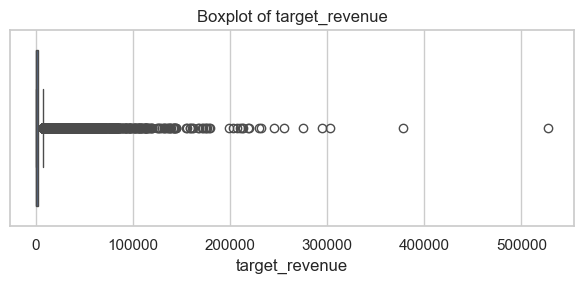

In [4]:
# Check outliers
cols_to_check = [
    'view_count_mean', 'cart_count_mean', 'purchase_count_mean',
    'time_to_view_mean', 'time_to_cart_mean', 'time_to_purchase_mean',
    'target_customer_value', 'target_actual_profit', 'target_revenue'
]

for col in cols_to_check:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [ ]:
# columns to keep
cols_keep = [
    # IDs & targets
    'user_id', 'target_event', 'target_customer_value',
    'target_revenue', 'target_actual_profit',
    
    # Funnel means
    'view_count_mean', 'cart_count_mean', 'purchase_count_mean',
    
    # Time means
    'time_to_view_mean', 'time_to_cart_mean', 'time_to_purchase_mean',
    
    # Revenue means
    'view_revenue_mean', 'cart_revenue_mean', 'purchase_revenue_mean',
    
    # Session dynamics
    'session_number_mean', 'inter_session_time_mean', 'session_recency_mean',
    
    # Purchase dynamics
    'purchase_number_mean', 'inter_purchase_time_mean', 'purchase_recency_mean',
    
    # Ratios
    'session_count_ratio', 'click_count_ratio', 'transaction_count_ratio',
    
    # Trend features
    'purchase_count_month_lag0', 'purchase_count_month_ma3',
    
    # Derived flag
    'is_direct_buyer'
]

ecom_core = df[cols_keep].copy()
output_path = r'C:\Users\luket\projects\traditonal\ecom_core.csv'
ecom_core.to_csv(output_path, index=False)
print("Processed dataset saved to:", output_path)

Processed dataset saved to: C:\Users\luket\projects\traditonal\ecom_core.csv
